# Exercise 1-2: Linear Regression with Multiple Variables

In this part, we will implement linear regression with multiple variables to predict the prices of houses.

## Part 1: Feature Normalization

`ex1data2.txt` contains a dataset of housing prices, including the size of the house (in square feet), the number of bedrooms, and the price of the house.

In [1]:
import numpy as np


data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Print out some data points
print 'First 10 examples from the dataset:\n',
for i in range(10):
    print 'x =', X[i, ], ', y =', y[i]

First 10 examples from the dataset:
x = [ 2104.     3.] , y = 399900.0
x = [ 1600.     3.] , y = 329900.0
x = [ 2400.     3.] , y = 369000.0
x = [ 1416.     2.] , y = 232000.0
x = [ 3000.     4.] , y = 539900.0
x = [ 1985.     4.] , y = 299900.0
x = [ 1534.     3.] , y = 314900.0
x = [ 1427.     3.] , y = 198999.0
x = [ 1380.     3.] , y = 212000.0
x = [ 1494.     3.] , y = 242500.0


Note that the house sizes (first colums in `X`) are about 1000 times the number of bedrooms (second column in `X`). The `feature_normalize()` normalizes the input features and set then to zero mean.

In [2]:
def feature_normalize(X):
    """
    Normalizes the features in x.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features to be normalized.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        A normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    mu : ndarray, shape (n_features,)
        The mean value.
    sigma : ndarray, shape (n_features,)
        The standard deviation.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

Normalize `X` and add intercept term: 

In [3]:
X, mu, sigma = feature_normalize(X)
X = np.hstack((np.ones((m, 1)), X))

## Part 2: Gradient Descent

Before runngin gradient descent, the parameters are initialized as follows:

In [4]:
# Choose some alpha value
alpha = 0.15
num_iters = 400

# Init theta and run gradient descent
theta = np.zeros(3)

The `compute_cost_multi()` computes the cost for linear regression with multiple variables in a vectorized way.

In [5]:
def compute_cost_multi(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Linear regression parameter.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m = len(y)
    diff = X.dot(theta) - y
    J = 1.0 / (2 * m) * diff.T.dot(diff)
    return J

The `gradient_descent_multi()` performs the gradient descent to learn theta.

In [6]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    theta : ndarray, shape (n_features,)
        Initial linear regression parameter.
    alpha : float
        Learning rate.
    num_iters: int
        Number of iteration.

    Returns
    -------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    J_history: ndarray, shape (num_iters,)
        Cost history.
    """
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = compute_cost_multi(X, y, theta)

    return theta, J_history

Run gradient descent with given parameters:

In [7]:
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

Plot convergence graph:

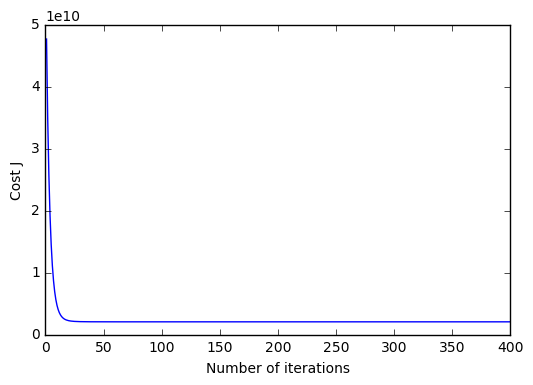

In [8]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(range(1, num_iters + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

Display the `theta`: 

In [9]:
print 'Theta computed from gradient descent:'
print theta

Theta computed from gradient descent:
[ 340412.65957447  110631.0502787    -6649.47427067]


Estimate the price of a 1650 sq-ft, 3 br house: 

In [10]:
normalize_test_data = ((np.array([1650, 3]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print 'Predicted price of a 1650 sq-ft, 3 br house:', price

Predicted price of a 1650 sq-ft, 3 br house: 293081.464335


## Part 3: Normal Equations

In this part, we will math out the parameter theta by using normal equation.

We use the same data as the gradient descent method.

In [11]:
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

The `normal_eqn()` computes the closed-form solution to linear regression.

In [12]:
def normal_eqn(X, y):
    """
    Computes the closed-form solution to linear regression.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.

    Returns
    -------
    theta : ndarray, shape (n_features,)
        The closed-form solution to linear regression using the normal equations.
    """
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

Calculate the parameters from the normal equation: 

In [13]:
theta = normal_eqn(X, y)
print 'Theta computed from the normal equations: '
print theta

Theta computed from the normal equations: 
[ 89597.90954361    139.21067402  -8738.01911255]


Estimate the price of a 1650 sq-ft, 3 br house:

In [14]:
price = np.array([1, 1650, 3]).dot(theta)
print 'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', price

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464335
